<h1>1. Описание данных </h1>

Загрузим данные в pandas:

In [1]:
import pandas as pd

In [2]:
import os
import re

In [3]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '.library.json',
 'best_tree.dot',
 'best_tree.png',
 'best_tree.svg',
 'main.ipynb',
 'new_best_tree.dot',
 'README.md',
 'tree.dot',
 'tree.png',
 'weatherAUS.csv']

In [4]:
data = pd.read_csv('weatherAUS.csv')

Заметим, что в выборке присутствует несколько городов, перечислим их и посчитаем количество:

In [5]:
all_cities = set(data['Location'])
print(all_cities)
print("Всего городов:  ", len(all_cities))

{'Wollongong', 'Nhil', 'WaggaWagga', 'Albany', 'Portland', 'Perth', 'Uluru', 'Cobar', 'Katherine', 'Richmond', 'NorahHead', 'Bendigo', 'Mildura', 'AliceSprings', 'Cairns', 'NorfolkIsland', 'Dartmoor', 'Walpole', 'Watsonia', 'Melbourne', 'MountGinini', 'Witchcliffe', 'Brisbane', 'Canberra', 'Newcastle', 'Sydney', 'Albury', 'Sale', 'Ballarat', 'MelbourneAirport', 'Townsville', 'MountGambier', 'Nuriootpa', 'PearceRAAF', 'PerthAirport', 'Launceston', 'BadgerysCreek', 'SydneyAirport', 'Darwin', 'Williamtown', 'Adelaide', 'Hobart', 'SalmonGums', 'Moree', 'CoffsHarbour', 'Tuggeranong', 'Woomera', 'GoldCoast', 'Penrith'}
Всего городов:   49


Также посчитаем, наблюдения по скольким дням присутствуют в выборке:

In [6]:
all_dates = set(data['Date'])
print("Всего дней:  ", len(all_dates))

Всего дней:   3436


Посмотрим, сколько всего записей в датасете:

In [7]:
len(data.index)

142193

In [8]:
3436*49

168364

In [9]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


Вывод - в датасете присутствуют данные не для каждой пары "Город-день"

Введём переменную "Номер дня":

In [10]:
def date_to_nth_day(date, format='%Y%m%d'):
    date = pd.to_datetime(date, format=format)
    new_year_day = pd.Timestamp(year=date.year, month=1, day=1)
    return (date - new_year_day).days + 1

In [11]:
data['num_day'] = data.Date.apply(lambda x: float(date_to_nth_day(re.sub("-","",x))))

Рассмотрим основные описательные статистики датасета:

In [12]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,num_day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,336.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,337.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,338.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,339.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,340.0
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No,341.0
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No,342.0
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No,343.0
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes,344.0
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No,345.0


In [13]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,num_day
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682,179.429226
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969,104.760850
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,89.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,176.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000,270.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,366.000000


Посмотрим какие типы данных представлены в датасете:

In [14]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
num_day          float64
dtype: object

Видим, что pandas определил два типа - float64 и object. Переменные типа float64 - численные, а типа object - скорее всего, категориальные

Посмотрим на категориальные переменные:

In [15]:
cat_data = data.select_dtypes(include="object")
cat_data.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


<h1>2. Попытка борьбы с пропущенными значениями при помощи регрессии</h1>

Посмотрим, сколько у нас в датасете записей с пропущенными значениями:

In [16]:
len(data) - len(data.dropna())

85773

И сколько всего записей:

In [17]:
len(data)

142193

А теперь в процентном соотношении:

In [18]:
(len(data) - len(data.dropna()))/len(data)

0.6032153481535659

In [19]:
(len(cat_data) - len(cat_data.dropna()))/len(cat_data)

0.12998530166745198

в 60% датасета есть пропущенные значения

в 12,98% категориальных переменных есть пропущенные значения

Посмотрим по колонкам:

In [20]:
for col in data:
    print(col, (len(data[col]) - len(data[col].dropna()))/len(data))

Date 0.0
Location 0.0
MinTemp 0.004479826714395224
MaxTemp 0.002264527789694289
Rainfall 0.009887969168665123
Evaporation 0.42789026182723483
Sunshine 0.47692924405561454
WindGustDir 0.06561504434114197
WindGustSpeed 0.06519308264119894
WindDir9am 0.07041837502549352
WindDir3pm 0.026569521706413114
WindSpeed9am 0.00948007285872019
WindSpeed3pm 0.018495987847503042
Humidity9am 0.01247600092831574
Humidity3pm 0.025388028946572615
Pressure9am 0.09855618771669492
Pressure3pm 0.09832410878172625
Cloud9am 0.3773533155640573
Cloud3pm 0.4015246882757942
Temp9am 0.00635755627914173
Temp3pm 0.0191711265674119
RainToday 0.009887969168665123
RISK_MM 0.0
RainTomorrow 0.0
num_day 0.0


Решение - выбрасываем значения nan для всех переменных, а также выбрасываем столбцы Evaporation (42,79% nan), Sunshine(47,69%), Cloud9am(37,73% nan) и Cloud3pm(40,15% nan):

In [21]:
data = data.dropna(subset = set(i for i in data).difference({'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'}))

In [22]:
data = data.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])

Теперь закодируем категориальные переменные в датасете:

In [23]:
num_X_zero = data.select_dtypes("float64")
cat_X_zero = data.select_dtypes("object")

In [24]:
cat_X_zero.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [25]:
len(set(cat_X_zero.index))

112925

In [26]:
data = data.drop(columns=['Date'])

Замненим на dummy-переменные все переменные, кроме RainToday - она и так бинарная:

In [27]:
dummy_cat_X_zero = pd.concat([pd.get_dummies(cat_X_zero[col], drop_first=True) for col in cat_X_zero], axis=1, keys=cat_X_zero.columns)

In [28]:
new_columns = dummy_cat_X_zero.columns.values
new_columns[-2] = "RainToday"
new_columns[-1] = "RainTomorrow"
dummy_cat_X_zero.columns = new_columns
dummy_cat_X_zero.columns[-2:]

Index(['RainToday', 'RainTomorrow'], dtype='object')

In [29]:
X_zero = pd.concat([num_X_zero, dummy_cat_X_zero], axis=1)

In [30]:
X_zero

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,"(WindDir3pm, S)","(WindDir3pm, SE)","(WindDir3pm, SSE)","(WindDir3pm, SSW)","(WindDir3pm, SW)","(WindDir3pm, W)","(WindDir3pm, WNW)","(WindDir3pm, WSW)",RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,1,0,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,1,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,...,0,0,0,0,0,1,0,0,0,0
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,0,0,0,0,0,1,0,0,0,0
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,...,0,0,0,0,0,1,0,0,0,0
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,...,0,0,0,0,0,0,0,0,0,1
9,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,...,0,0,1,0,0,0,0,0,1,0


<h1>9. Предсказание того, будет ли завтра дождь при помощи многослойного персептрона</h1>

Для того, чтобы преобразовать категориальные переменные к числовым, используем one-hot encoding из pandas, предварительно очистив данные от пропущенных значений:

In [31]:
clean_data = data.dropna()
X = clean_data.drop('RISK_MM', axis=1)

In [32]:
y = pd.get_dummies(clean_data['RainTomorrow'], drop_first=True)['Yes'].rename('RainTomorrow')

In [33]:
X.RainToday = X.RainToday.apply(lambda x: 1 if x=="Yes" else 0)

In [34]:
cat_X = X.select_dtypes("object")
num_X = X.select_dtypes(exclude="object")

In [35]:
cat_X = pd.concat([pd.get_dummies(cat_X[col]) for col in cat_X], axis=1, keys=cat_X.columns)

Посмотрим, как у нас закодировались категориальные переменные:

In [36]:
cat_X.head()

Location                                                                     \
  Adelaide Albury AliceSprings BadgerysCreek Ballarat Bendigo Brisbane Cairns   
0        0      1            0             0        0       0        0      0   
1        0      1            0             0        0       0        0      0   
2        0      1            0             0        0       0        0      0   
3        0      1            0             0        0       0        0      0   
4        0      1            0             0        0       0        0      0   

                 ... WindDir3pm                          RainTomorrow      
  Canberra Cobar ...          S SE SSE SSW SW  W WNW WSW           No Yes  
0        0     0 ...          0  0   0   0  0  0   1   0            1   0  
1        0     0 ...          0  0   0   0  0  0   0   1            1   0  
2        0     0 ...          0  0   0   0  0  0   0   1            1   0  
3        0     0 ...          0  0   0   0  0  0   0   0            1   0  
4        0     0 ...          0  0   0   0  0  0   0   0            1   0  

[5 rows x 94 columns]

In [37]:
X = pd.concat([num_X, cat_X], axis=1)

Теперь, после преобразования, наш датасет выглядит так:

In [38]:
new_columns = X.columns.values
new_columns[-2] = "RainTomorrowNo"
new_columns[-1] = "RainTomorrowYes"
X.columns = new_columns

In [39]:
from sklearn.model_selection import train_test_split

# NeuroData, NeuroDataTest = train_test_split(X.loc[X['RainTomorrowYes'].index], X['RainTomorrowYes'], random_state=42)
NeuroData = X

In [40]:
NeuroData

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,"(WindDir3pm, S)","(WindDir3pm, SE)","(WindDir3pm, SSE)","(WindDir3pm, SSW)","(WindDir3pm, SW)","(WindDir3pm, W)","(WindDir3pm, WNW)","(WindDir3pm, WSW)",RainTomorrowNo,RainTomorrowYes
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,1,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,1,1,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,1,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,1,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,1,0
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,...,0,0,0,0,0,1,0,0,1,0
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,0,0,0,0,0,1,0,0,1,0
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,...,0,0,0,0,0,1,0,0,1,0
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,...,0,0,0,0,0,0,0,0,0,1
9,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,...,0,0,1,0,0,0,0,0,1,0


Обучим многослойный персептрон:

In [41]:
from __future__ import print_function
import tensorflow as tf

In [43]:
# Parameters
learning_rate = 0.1
num_steps = 5000
batch_size = 1000
display_step = 10

In [44]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 106 # data input
num_classes = 2 # total classes (yes-no)
Limit = len(NeuroData)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}


# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construct model
logits = neural_net(X)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [77]:
# Start training
summary_writer = tf.summary.FileWriter('data/logs', graph_def=sess.graph_def)

from numpy import array
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3)
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True))
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        if ((step-1)*batch_size+batch_size) % Limit < ((step-1)*batch_size) % Limit:
            xxx = range(((step-1)*batch_size) % Limit, Limit)
            yyy = range(0,Limit-((step-1)*batch_size) % Limit)
            x1 = [NeuroData[i:i+1].values.tolist()[0][:-2] for i in xxx]
            x2 = [NeuroData[i:i+1].values.tolist()[0][:-2] for i in yyy]
            batch_x = [*x1, *x2]
            batch_x = array(batch_x[:batch_size])
            y1 = [NeuroData[i:i+1].values.tolist()[0][-2:] for i in xxx]
            y2 = [NeuroData[i:i+1].values.tolist()[0][:-2] for i in yyy]
            batch_y = [*y1, *y2]
            batch_y = array(batch_y[:batch_size])
        else:
            xxx = range(((step-1)*batch_size) % Limit, ((step-1)*batch_size+batch_size) % Limit)
            batch_x = array([NeuroData[i:i+1].values.tolist()[0][:-2] for i in xxx])
            batch_y = array([NeuroData[i:i+1].values.tolist()[0][-2:] for i in xxx])
        # print(batch_x,type(batch_x),len(batch_x))
        # print(batch_y,type(batch_y),len(batch_y))
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: array(NeuroDataTest[1:].values.tolist()[0][:-2]),
                                      Y: array(NeuroDataTest[1:].values.tolist()[0][-2:])}))

Step 1, Minibatch Loss= 2486217.2500, Training Accuracy= 0.762
Step 10, Minibatch Loss= 401576.0000, Training Accuracy= 0.747
Step 20, Minibatch Loss= 32443.5801, Training Accuracy= 0.782
Step 30, Minibatch Loss= 57892.5781, Training Accuracy= 0.275
Step 40, Minibatch Loss= 25556.6270, Training Accuracy= 0.432
Step 50, Minibatch Loss= 11117.8643, Training Accuracy= 0.593
Step 60, Minibatch Loss= 2703.2000, Training Accuracy= 0.787
Step 70, Minibatch Loss= 5314.9106, Training Accuracy= 0.722
Step 80, Minibatch Loss= 1705.7832, Training Accuracy= 0.767
Step 90, Minibatch Loss= 776.3605, Training Accuracy= 0.826
Step 100, Minibatch Loss= 2142.0317, Training Accuracy= 0.715
Step 110, Minibatch Loss= 1056.7847, Training Accuracy= 0.833


ValueError: setting an array element with a sequence.

In [75]:
batch_x

array([[ 11.9,  33.9,   0. , ...,   0. ,   0. ,   0. ],
       [ 12.9,  30.7,   0. , ...,   0. ,   0. ,   0. ],
       [ 15.6,  27.9,   0. , ...,   0. ,   0. ,   0. ],
       ..., 
       [ 12.5,  28.8,   0. , ...,   0. ,   0. ,   0. ],
       [ 18. ,  32. ,   0. , ...,   0. ,   0. ,   0. ],
       [ 16.2,  34. ,   0. , ...,   0. ,   0. ,   1. ]])

In [58]:
for step in range(1, num_steps+1):
    if ((step-1)*batch_size+batch_size) % Limit < ((step-1)*batch_size) % Limit:
        x = range(((step-1)*batch_size) % Limit, Limit)
        y = range(0,Limit-((step-1)*batch_size) % Limit)
        sss = list(x)
        yyy = list(y)
        print(sss[0],"to",sss[-1],"and",yyy[0],"to",yyy[-1])
    else:
        x = range(((step-1)*batch_size) % Limit, ((step-1)*batch_size+batch_size) % Limit)
        sss = list(x)
        print(sss[0],"to",sss[-1])

0 to 999
1000 to 1999
2000 to 2999
3000 to 3999
4000 to 4999
5000 to 5999
6000 to 6999
7000 to 7999
8000 to 8999
9000 to 9999
10000 to 10999
11000 to 11999
12000 to 12999
13000 to 13999
14000 to 14999
15000 to 15999
16000 to 16999
17000 to 17999
18000 to 18999
19000 to 19999
20000 to 20999
21000 to 21999
22000 to 22999
23000 to 23999
24000 to 24999
25000 to 25999
26000 to 26999
27000 to 27999
28000 to 28999
29000 to 29999
30000 to 30999
31000 to 31999
32000 to 32999
33000 to 33999
34000 to 34999
35000 to 35999
36000 to 36999
37000 to 37999
38000 to 38999
39000 to 39999
40000 to 40999
41000 to 41999
42000 to 42999
43000 to 43999
44000 to 44999
45000 to 45999
46000 to 46999
47000 to 47999
48000 to 48999
49000 to 49999
50000 to 50999
51000 to 51999
52000 to 52999
53000 to 53999
54000 to 54999
55000 to 55999
56000 to 56999
57000 to 57999
58000 to 58999
59000 to 59999
60000 to 60999
61000 to 61999
62000 to 62999
63000 to 63999
64000 to 64999
65000 to 65999
66000 to 66999
67000 to 67999
6800

20750 to 21749
21750 to 22749
22750 to 23749
23750 to 24749
24750 to 25749
25750 to 26749
26750 to 27749
27750 to 28749
28750 to 29749
29750 to 30749
30750 to 31749
31750 to 32749
32750 to 33749
33750 to 34749
34750 to 35749
35750 to 36749
36750 to 37749
37750 to 38749
38750 to 39749
39750 to 40749
40750 to 41749
41750 to 42749
42750 to 43749
43750 to 44749
44750 to 45749
45750 to 46749
46750 to 47749
47750 to 48749
48750 to 49749
49750 to 50749
50750 to 51749
51750 to 52749
52750 to 53749
53750 to 54749
54750 to 55749
55750 to 56749
56750 to 57749
57750 to 58749
58750 to 59749
59750 to 60749
60750 to 61749
61750 to 62749
62750 to 63749
63750 to 64749
64750 to 65749
65750 to 66749
66750 to 67749
67750 to 68749
68750 to 69749
69750 to 70749
70750 to 71749
71750 to 72749
72750 to 73749
73750 to 74749
74750 to 75749
75750 to 76749
76750 to 77749
77750 to 78749
78750 to 79749
79750 to 80749
80750 to 81749
81750 to 82749
82750 to 83749
83750 to 84749
84750 to 85749
85750 to 86749
86750 to 8

44200 to 45199
45200 to 46199
46200 to 47199
47200 to 48199
48200 to 49199
49200 to 50199
50200 to 51199
51200 to 52199
52200 to 53199
53200 to 54199
54200 to 55199
55200 to 56199
56200 to 57199
57200 to 58199
58200 to 59199
59200 to 60199
60200 to 61199
61200 to 62199
62200 to 63199
63200 to 64199
64200 to 65199
65200 to 66199
66200 to 67199
67200 to 68199
68200 to 69199
69200 to 70199
70200 to 71199
71200 to 72199
72200 to 73199
73200 to 74199
74200 to 75199
75200 to 76199
76200 to 77199
77200 to 78199
78200 to 79199
79200 to 80199
80200 to 81199
81200 to 82199
82200 to 83199
83200 to 84199
84200 to 85199
85200 to 86199
86200 to 87199
87200 to 88199
88200 to 89199
89200 to 90199
90200 to 91199
91200 to 92199
92200 to 93199
93200 to 94199
94200 to 95199
95200 to 96199
96200 to 97199
97200 to 98199
98200 to 99199
99200 to 100199
100200 to 101199
101200 to 102199
102200 to 103199
103200 to 104199
104200 to 105199
105200 to 106199
106200 to 107199
107200 to 108199
108200 to 109199
109200

32725 to 33724
33725 to 34724
34725 to 35724
35725 to 36724
36725 to 37724
37725 to 38724
38725 to 39724
39725 to 40724
40725 to 41724
41725 to 42724
42725 to 43724
43725 to 44724
44725 to 45724
45725 to 46724
46725 to 47724
47725 to 48724
48725 to 49724
49725 to 50724
50725 to 51724
51725 to 52724
52725 to 53724
53725 to 54724
54725 to 55724
55725 to 56724
56725 to 57724
57725 to 58724
58725 to 59724
59725 to 60724
60725 to 61724
61725 to 62724
62725 to 63724
63725 to 64724
64725 to 65724
65725 to 66724
66725 to 67724
67725 to 68724
68725 to 69724
69725 to 70724
70725 to 71724
71725 to 72724
72725 to 73724
73725 to 74724
74725 to 75724
75725 to 76724
76725 to 77724
77725 to 78724
78725 to 79724
79725 to 80724
80725 to 81724
81725 to 82724
82725 to 83724
83725 to 84724
84725 to 85724
85725 to 86724
86725 to 87724
87725 to 88724
88725 to 89724
89725 to 90724
90725 to 91724
91725 to 92724
92725 to 93724
93725 to 94724
94725 to 95724
95725 to 96724
96725 to 97724
97725 to 98724
98725 to 9

5175 to 6174
6175 to 7174
7175 to 8174
8175 to 9174
9175 to 10174
10175 to 11174
11175 to 12174
12175 to 13174
13175 to 14174
14175 to 15174
15175 to 16174
16175 to 17174
17175 to 18174
18175 to 19174
19175 to 20174
20175 to 21174
21175 to 22174
22175 to 23174
23175 to 24174
24175 to 25174
25175 to 26174
26175 to 27174
27175 to 28174
28175 to 29174
29175 to 30174
30175 to 31174
31175 to 32174
32175 to 33174
33175 to 34174
34175 to 35174
35175 to 36174
36175 to 37174
37175 to 38174
38175 to 39174
39175 to 40174
40175 to 41174
41175 to 42174
42175 to 43174
43175 to 44174
44175 to 45174
45175 to 46174
46175 to 47174
47175 to 48174
48175 to 49174
49175 to 50174
50175 to 51174
51175 to 52174
52175 to 53174
53175 to 54174
54175 to 55174
55175 to 56174
56175 to 57174
57175 to 58174
58175 to 59174
59175 to 60174
60175 to 61174
61175 to 62174
62175 to 63174
63175 to 64174
64175 to 65174
65175 to 66174
66175 to 67174
67175 to 68174
68175 to 69174
69175 to 70174
70175 to 71174
71175 to 72174
7217

111550 to 112549
112550 to 112924 and 0 to 374
625 to 1624
1625 to 2624
2625 to 3624
3625 to 4624
4625 to 5624
5625 to 6624
6625 to 7624
7625 to 8624
8625 to 9624
9625 to 10624
10625 to 11624
11625 to 12624
12625 to 13624
13625 to 14624
14625 to 15624
15625 to 16624
16625 to 17624
17625 to 18624
18625 to 19624
19625 to 20624
20625 to 21624
21625 to 22624
22625 to 23624
23625 to 24624
24625 to 25624
25625 to 26624
26625 to 27624
27625 to 28624
28625 to 29624
29625 to 30624
30625 to 31624
31625 to 32624
32625 to 33624
33625 to 34624
34625 to 35624
35625 to 36624
36625 to 37624
37625 to 38624
38625 to 39624
39625 to 40624
40625 to 41624
41625 to 42624
42625 to 43624
43625 to 44624
44625 to 45624
45625 to 46624
46625 to 47624
47625 to 48624
48625 to 49624
49625 to 50624
50625 to 51624
51625 to 52624
52625 to 53624
53625 to 54624
54625 to 55624
55625 to 56624
56625 to 57624
57625 to 58624
58625 to 59624
59625 to 60624
60625 to 61624
61625 to 62624
62625 to 63624
63625 to 64624
64625 to 6562

99000 to 99999
100000 to 100999
101000 to 101999
102000 to 102999
103000 to 103999
104000 to 104999
105000 to 105999
106000 to 106999
107000 to 107999
108000 to 108999
109000 to 109999
110000 to 110999
111000 to 111999
112000 to 112924 and 0 to 924
75 to 1074
1075 to 2074
2075 to 3074
3075 to 4074
4075 to 5074
5075 to 6074
6075 to 7074
7075 to 8074
8075 to 9074
9075 to 10074
10075 to 11074
11075 to 12074
12075 to 13074
13075 to 14074
14075 to 15074
15075 to 16074
16075 to 17074
17075 to 18074
18075 to 19074
19075 to 20074
20075 to 21074
21075 to 22074
22075 to 23074
23075 to 24074
24075 to 25074
25075 to 26074
26075 to 27074
27075 to 28074
28075 to 29074
29075 to 30074
30075 to 31074
31075 to 32074
32075 to 33074
33075 to 34074
34075 to 35074
35075 to 36074
36075 to 37074
37075 to 38074
38075 to 39074
39075 to 40074
40075 to 41074
41075 to 42074
42075 to 43074
43075 to 44074
44075 to 45074
45075 to 46074
46075 to 47074
47075 to 48074
48075 to 49074
49075 to 50074
50075 to 51074
51075 t

In [55]:
112 in range (100,200)

True

Посмотрим на важность признаков:

In [34]:
dec_tree_importances = dict()
for index, param in enumerate([i for i in X]):
    dec_tree_importances[param] = dumbClassifier.feature_importances_[index]

In [36]:
for feature in sorted(dec_tree_importances, key = lambda x: dec_tree_importances[x],
                      reverse=True):
    print(feature, dec_tree_importances[feature])

Humidity3pm 0.26770174723096163
Sunshine 0.08862656082438264
Pressure3pm 0.06894177896541616
WindGustSpeed 0.04751298677153646
Pressure9am 0.029363550503261174
Evaporation 0.02577214823603843
Humidity9am 0.02505295584590737
Temp3pm 0.023010965350053314
MinTemp 0.022240968974934675
WindSpeed3pm 0.022083415663807324
Rainfall 0.02170242570252734
Temp9am 0.02129655014228951
MaxTemp 0.020877262118600616
WindSpeed9am 0.02053875438003366
Year 0.01390577131658261
Cloud9am 0.012742126670926808
Cloud3pm 0.012517836869773511
('Location', 'PerthAirport') 0.0033610247902684273
('Location', 'Perth') 0.003059772651285219
('WindDir9am', 'N') 0.002638117364657332
('WindGustDir', 'NNE') 0.0023541948706432723
('Location', 'Brisbane') 0.0023525044871394443
('Location', 'SydneyAirport') 0.0023331038359533083
('WindDir9am', 'E') 0.0023185570155089385
('WindGustDir', 'NW') 0.0022612548087572945
('WindDir9am', 'SSW') 0.0022366110379171945
('Location', 'MountGambier') 0.0022245938049025257
('WindDir3pm', 'ENE'

('Date', '02-19') 0.00011071300104637587
('Date', '05-05') 0.00010924660368152507
('Date', '08-27') 0.00010889446924855615
('Date', '05-14') 0.0001065843753106499
('Date', '02-24') 8.987356429776102e-05
('Date', '02-12') 7.2298651686892e-05
('Date', '10-11') 7.18348571640436e-05
('Date', '10-30') 6.898094499141297e-05
('Date', '01-14') 6.311942471273409e-05
('Date', '08-04') 6.066460704947832e-05
('Date', '08-15') 6.0144998739287465e-05
('Date', '02-18') 5.455587636664057e-05
('Date', '09-11') 4.529717852240671e-05
('Date', '06-28') 4.399441962597743e-05
('Date', '01-15') 3.9144750968046866e-05
('Date', '02-20') 3.901497591230187e-05
('Date', '02-23') 3.873715776874577e-05
('Date', '03-05') 3.1353646518492025e-05
('Date', '06-23') 2.7087541749192165e-05
('Date', '02-07') 1.5629780275540898e-05
('Date', '12-29') 1.2031687007149812e-05
('Date', '01-02') 0.0
('Date', '01-06') 0.0
('Date', '01-21') 0.0
('Date', '02-28') 0.0
('Date', '03-20') 0.0
('Date', '04-30') 0.0
('Date', '05-06') 0.0


Самым важным признаком оказывается влажность в 3 часа дня - она снижает Критерий нечистоты (impurity) Джини на 26,77%, затем следует Sunshine, однако её вклад оказывается не таким большим. Наименьшее влияние оказывает на классификацию день календаря. Любопытно, что год сильнее влияет на разделение классов, чем такие параметры, облачность в 9 часов утра и в 3 часа дня.

Проверим кросс-валидацией c дефолтным K=3:

In [39]:
from sklearn.model_selection import cross_validate

In [28]:
cross_validate(dumbClassifier, X, y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([3.64529395, 3.56208682, 3.53323841]),
 'score_time': array([0.0601728 , 0.06326747, 0.06080461]),
 'test_score': array([0.79327946, 0.70934808, 0.80899713]),
 'train_score': array([1., 1., 1.])}

Качеcтво на обучающей выборке всегда 100%, на тестовой - от 71% до 81%

Проверим также при K=9:

In [30]:
cross_validate(dumbClassifier, X, y, cv=9)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([5.57978487, 5.0245676 , 4.57162595, 4.71528769, 4.76106215,
        5.27751613, 5.03938794, 4.9519124 , 4.5883615 ]),
 'score_time': array([0.01284337, 0.01390219, 0.01393747, 0.01284242, 0.01329899,
        0.01582193, 0.01567602, 0.01666474, 0.01633883]),
 'test_score': array([0.6937799 , 0.69436912, 0.7926304 , 0.81879088, 0.55192216,
        0.51268145, 0.48014037, 0.79674537, 0.80855137]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1.])}

Тут уже не всё так хорошо - качество на тестовой выборке иногда падает до 48%

Попробуем менять глубину дерева:

Сначала посмотрим, какая глубина дерева у нас получилась:

In [31]:
dumbClassifier.tree_.max_depth

60

При глубине дерева 60 выборка уже идеально разделяется на два класса

Попробуем изменять глубину от 10 до 59, проверяя кросс-валидацией при $K=3$:

In [40]:
Classifiers = dict()
for i in range(10, 60):
    clf = DecisionTreeClassifier(random_state=42, max_depth=i)
    cv = cross_validate(clf, X, y, cv=9)
    print('depth = '+str(i)+': '+str(cv))
    Classifiers['depth = '+str(i)] = cv

depth = 10: {'fit_time': array([5.39411426, 5.623353  , 5.24733567, 5.12157726, 4.58840418,
       5.18465495, 4.53991151, 4.98986363, 4.87769628]), 'score_time': array([0.03992343, 0.02949023, 0.03188014, 0.02367115, 0.01592636,
       0.02726197, 0.02650738, 0.02326393, 0.0330658 ]), 'test_score': array([0.73062201, 0.7227628 , 0.82086457, 0.84303717, 0.58494178,
       0.54330834, 0.5343755 , 0.81844288, 0.84747926]), 'train_score': array([0.88646062, 0.88560547, 0.88470818, 0.88409005, 0.88269426,
       0.88335228, 0.8793045 , 0.88415218, 0.88189903])}
depth = 11: {'fit_time': array([5.79388213, 5.43623281, 5.14915943, 5.61864519, 5.57917571,
       5.41142273, 7.84535313, 6.83844519, 5.98659968]), 'score_time': array([0.05475831, 0.02629781, 0.03529167, 0.04372001, 0.02807331,
       0.06104398, 0.02410817, 0.04140472, 0.02332759]), 'test_score': array([0.723126  , 0.72196523, 0.81767427, 0.84527038, 0.58079439,
       0.53916095, 0.53054714, 0.82003829, 0.83950223]), 'train_scor

depth = 25: {'fit_time': array([6.72410345, 7.4669807 , 6.72372818, 7.27983904, 7.49685335,
       7.39010835, 7.92544961, 7.11923528, 7.04073238]), 'score_time': array([0.01730347, 0.01714373, 0.01820445, 0.01727843, 0.01586342,
       0.03351545, 0.01539779, 0.01739931, 0.02311444]), 'test_score': array([0.70127592, 0.70059021, 0.7978944 , 0.82261924, 0.55798373,
       0.51762642, 0.48987079, 0.80727505, 0.81285897]), 'train_score': array([0.98687936, 0.98366932, 0.98548384, 0.98305119, 0.98484577,
       0.98023968, 0.98273215, 0.98087813, 0.98558383])}
depth = 26: {'fit_time': array([7.42570662, 7.71804738, 6.94053388, 9.8614223 , 8.73566079,
       8.35216093, 7.78113818, 7.49672294, 7.40776014]), 'score_time': array([0.03824711, 0.03352356, 0.01536441, 0.02204609, 0.02475166,
       0.01608777, 0.01562786, 0.01786184, 0.01872301]), 'test_score': array([0.70031898, 0.69755942, 0.79853246, 0.82421439, 0.55638858,
       0.51938108, 0.49258255, 0.80839183, 0.81541161]), 'train_scor

depth = 40: {'fit_time': array([8.24072027, 8.91235948, 8.5629735 , 8.09097219, 7.98928118,
       8.64492989, 9.43586016, 8.49935269, 8.83570147]), 'score_time': array([0.0169251 , 0.01614118, 0.02153254, 0.01478934, 0.01493335,
       0.02031803, 0.0209322 , 0.02376294, 0.01287079]), 'test_score': array([0.69505582, 0.69532621, 0.79661828, 0.82150263, 0.55686712,
       0.50996969, 0.48556389, 0.80169113, 0.80504148]), 'train_score': array([0.99798604, 0.99653048, 0.9978465 , 0.99806584, 0.99890331,
       0.99748759, 0.99661024, 0.9961517 , 0.99866406])}
depth = 41: {'fit_time': array([ 9.13148284, 10.64854574,  9.91567755,  9.51123905,  9.12137699,
        8.55844927,  8.96740437,  7.32919931,  8.7112267 ]), 'score_time': array([0.0195179 , 0.02122188, 0.01730204, 0.01805043, 0.02012777,
       0.02710223, 0.01848817, 0.02548814, 0.01718998]), 'test_score': array([0.69090909, 0.69261445, 0.79534216, 0.82102409, 0.55415537,
       0.50837454, 0.48061892, 0.79834078, 0.8106254 ]), 't

depth = 55: {'fit_time': array([8.76192999, 8.9945755 , 8.51659918, 8.83330798, 9.16977954,
       9.78928661, 9.734097  , 8.8212502 , 9.07249403]), 'score_time': array([0.02018905, 0.0160234 , 0.02274823, 0.01664257, 0.01643276,
       0.0182662 , 0.01828575, 0.02146506, 0.01599765]), 'test_score': array([0.6937799 , 0.69596427, 0.79390652, 0.81767427, 0.55208167,
       0.51475514, 0.48444728, 0.79722399, 0.80488194]), 'train_score': array([1.        , 0.99952145, 0.99972084, 0.9999003 , 0.99996012,
       0.99966102, 0.99874379, 0.99970091, 0.99996012])}
depth = 56: {'fit_time': array([9.73339653, 9.87116313, 8.78651595, 8.80647874, 9.26053429,
       9.18506837, 9.32335258, 9.6760931 , 9.61043668]), 'score_time': array([0.0259881 , 0.0174315 , 0.02182317, 0.02066779, 0.01658416,
       0.01657343, 0.01268387, 0.01715493, 0.02505732]), 'test_score': array([0.6937799 , 0.69325251, 0.79278992, 0.82214069, 0.55271973,
       0.51300048, 0.48396874, 0.79754308, 0.80855137]), 'train_scor

Найдём классификатор с лучшей минимальной точностью на кросс-валидации:

In [43]:
sorted(Classifiers, key=lambda x: min(Classifiers[x]['test_score']), reverse=True)[0]

'depth = 10'

Это классификатор с минимальной рассмотренной глубиной дерева - 10:

In [44]:
Classifiers['depth = 10']

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([5.39411426, 5.623353  , 5.24733567, 5.12157726, 4.58840418,
        5.18465495, 4.53991151, 4.98986363, 4.87769628]),
 'score_time': array([0.03992343, 0.02949023, 0.03188014, 0.02367115, 0.01592636,
        0.02726197, 0.02650738, 0.02326393, 0.0330658 ]),
 'test_score': array([0.73062201, 0.7227628 , 0.82086457, 0.84303717, 0.58494178,
        0.54330834, 0.5343755 , 0.81844288, 0.84747926]),
 'train_score': array([0.88646062, 0.88560547, 0.88470818, 0.88409005, 0.88269426,
        0.88335228, 0.8793045 , 0.88415218, 0.88189903])}

Найдём классификатор с лучшей средней точностью:

In [45]:
mean = lambda x: sum(x)/len(x)

In [46]:
sorted(Classifiers, key=lambda x: mean(Classifiers[x]['test_score']), reverse=True)[0]

'depth = 10'

Найдём классификатор с лучшей максимальной точностью:

In [47]:
sorted(Classifiers, key=lambda x: max(Classifiers[x]['test_score']), reverse=True)[0]

'depth = 10'

Найдём классификатор с наименьшим разбросом точности:

In [48]:
val_range = lambda x: max(x) - min(x)

In [49]:
sorted(Classifiers, key=lambda x: val_range(Classifiers[x]['test_score']), reverse=True)[0]

'depth = 47'

In [50]:
Classifiers['depth = 47']

{'fit_time': array([8.14726496, 8.75584793, 8.34354401, 8.98355007, 9.26833773,
        9.46861553, 8.89540744, 7.56152511, 8.22210646]),
 'score_time': array([0.02267456, 0.01647615, 0.01654482, 0.01891971, 0.01636648,
        0.0159781 , 0.01540065, 0.01271915, 0.01644015]),
 'test_score': array([0.68883573, 0.69516669, 0.79278992, 0.82277875, 0.5512841 ,
        0.51188387, 0.47695007, 0.79546905, 0.80647735]),
 'train_score': array([0.99926221, 0.99868397, 0.99916253, 0.99928217, 0.99942175,
        0.99902295, 0.99790632, 0.99874382, 0.99956133])}

Выбираем классификатор с глубиной 10 как наилучший:

In [52]:
best_clf = DecisionTreeClassifier(max_depth=10, random_state=42).fit(X_train, y_train)

Посмотрим на важность признаков:

In [54]:
best_clf_importances = dict()
for index, param in enumerate([i for i in X]):
    best_clf_importances[param] = best_clf.feature_importances_[index]

In [57]:
for param in sorted(best_clf_importances, key=lambda x: best_clf_importances[x],
                    reverse=True):
    print(param, best_clf_importances[param])

Humidity3pm 0.4945669031843753
Sunshine 0.1306690972676486
Pressure3pm 0.09346018482311536
WindGustSpeed 0.06637454034702893
Rainfall 0.0226967525697103
Pressure9am 0.01603169147142936
Humidity9am 0.014344885234772703
Temp3pm 0.013347316426085618
Temp9am 0.012121559234684814
MinTemp 0.011843010026940584
Evaporation 0.011598401967932723
WindSpeed9am 0.0111695611919088
MaxTemp 0.009978071151783716
WindSpeed3pm 0.009328693878119694
Year 0.005113983607065555
Cloud3pm 0.004657923425937744
('WindDir9am', 'N') 0.003220169955944327
Cloud9am 0.0026460048282464597
('Location', 'PerthAirport') 0.0024136718526695843
('WindDir3pm', 'NW') 0.0018173838944924873
('WindDir3pm', 'SE') 0.0017756481242128873
('WindDir9am', 'NNE') 0.001673564929259295
('Location', 'Sydney') 0.0016642721822884168
('WindGustDir', 'NNE') 0.001598492990896251
('Location', 'Brisbane') 0.0015387732973301026
('WindGustDir', 'WNW') 0.001430843068509258
('Location', 'Cairns') 0.001414228109890353
('WindDir9am', 'SSE') 0.00120824609

('Location', 'Darwin') 0.0
('Location', 'Hobart') 0.0
('Location', 'Melbourne') 0.0
('Location', 'Moree') 0.0
('Location', 'SydneyAirport') 0.0
('Location', 'Townsville') 0.0
('Location', 'Woomera') 0.0
('WindGustDir', 'N') 0.0
('WindGustDir', 'SSE') 0.0
('WindGustDir', 'SSW') 0.0
('WindDir9am', 'ESE') 0.0
('WindDir9am', 'NNW') 0.0
('WindDir9am', 'SE') 0.0
('WindDir9am', 'WSW') 0.0
('WindDir3pm', 'ESE') 0.0
('WindDir3pm', 'N') 0.0
('WindDir3pm', 'NE') 0.0
('WindDir3pm', 'NNW') 0.0
('WindDir3pm', 'SW') 0.0
('WindDir3pm', 'W') 0.0
('WindDir3pm', 'WSW') 0.0


Визуализируем это дерево:

In [58]:
import graphviz
from sklearn.tree import export_graphviz

In [59]:
graph = export_graphviz(best_clf, out_file = 'new_best_tree.dot', feature_names = X.columns, class_names = ['Rain Tomorrow', 'No Rain Tomorrow'],
                       filled=True, rounded=True)

Визуализировать в ноутбуке не получилось, результат визуализации отдельно от ноутбука - в файле "new_best_tree.svg"

Определим функцию для энкодинга данных с заменой пропущенных значений:

In [60]:
def encode(data):
    X = data.drop('RainTomorrow', axis=1).drop('RISK_MM', axis=1)
    y = pd.get_dummies(data['RainTomorrow'], drop_first=True)['Yes'].rename('RainTomorrow')
    X.RainToday = X.RainToday.apply(lambda x: 1 if x=="Yes" else 0)
    cat_X = X.select_dtypes("object")
    num_X = X.select_dtypes(exclude="object")
    # Для числовых переменных заменяем на среднее значение:
    num_X = num_X.fillna(num_X.mean())
    # Для категориальных заменям на самое частотное значение:
    cat_X = cat_X.fillna(lambda y: cat_X[y].value_counts().index[0])
    cat_X = pd.concat([pd.get_dummies(cat_X[col], dummy_na=False) for col in cat_X], axis=1, keys=cat_X.columns)
    X = pd.concat([num_X, cat_X], axis=1)
    return X, y

Попробуем применить такой же классификатор на данных, в которых пропущенные значения заполнены:

In [61]:
new_X, new_y = encode(data)

In [62]:
new_X.columns

Index([            'MinTemp',             'MaxTemp',            'Rainfall',
               'Evaporation',            'Sunshine',       'WindGustSpeed',
              'WindSpeed9am',        'WindSpeed3pm',         'Humidity9am',
               'Humidity3pm',
       ...
       ('WindDir3pm', 'NNW'),  ('WindDir3pm', 'NW'),   ('WindDir3pm', 'S'),
        ('WindDir3pm', 'SE'), ('WindDir3pm', 'SSE'), ('WindDir3pm', 'SSW'),
        ('WindDir3pm', 'SW'),   ('WindDir3pm', 'W'), ('WindDir3pm', 'WNW'),
       ('WindDir3pm', 'WSW')],
      dtype='object', length=484)

In [63]:
new_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, random_state=42)

Посмотрим на performance классификатора с глубиной 10 на датасете с заменёнными значениями:

In [64]:
new_clf = new_clf.fit(new_X_train, new_y_train)

Качество на обучающей выборке:

In [65]:
new_clf.score(new_X_train, new_y_train)

0.8653557630996587

Качество на тестовой выборке:

In [66]:
new_clf.score(new_X_test, new_y_test)

0.8389546822695434

Кажется, всё почти идеально -  нет ни переобучения, ни недообучения

Прокроссвалидируем его:

In [71]:
cross_validate(new_clf, new_X, new_y, cv=9)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([14.90559006, 13.68835974, 12.44243789, 14.58060956, 12.65110803,
        13.82175779, 12.94526267, 14.4198122 , 15.38302541]),
 'score_time': array([0.13065362, 0.08963299, 0.07141638, 0.07158494, 0.08403683,
        0.08956909, 0.09495974, 0.07991147, 0.3564744 ]),
 'test_score': array([0.82841772, 0.73436709, 0.82506329, 0.8214444 , 0.79296158,
        0.73738844, 0.72472941, 0.73447687, 0.84555007]),
 'train_score': array([0.86455737, 0.86535647, 0.86466814, 0.86413912, 0.86295236,
        0.86126715, 0.86207415, 0.86399671, 0.86287432])}

Качество ещё лучше, чем на датасете с вырезанными пропущенными значениями - везде 0.7 - 0.8!

<h1>4. Предсказание того, будет ли завтра дождь, при помощи алгоритма Random Forest</h1>

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf_classifier = RandomForestClassifier(random_state=42, oob_score=True)

Обучим классификатор на той же выборке, на которой мы обучали решающие деревья:

In [140]:
rf_classifier = rf_classifier.fit(new_X_train, new_y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Посмотри на метрику <i>out-of-bag estimate</i>:

In [141]:
rf_classifier.oob_score_

0.822681069727317

Посмотрим на качество на всём датасете:

In [142]:
rf_classifier.score(new_X, new_y)

0.9502647809667143

Посмотрим на качество на обучающей выборке:

In [143]:
rf_classifier.score(new_X_train, new_y_train)

0.9864033607141518

Посмотрим на качество на тестовой выборке:

In [145]:
rf_classifier.score(new_X_test, new_y_test)

0.8418520914793665

<h1>5. Анализ данных при помощи Метода главных компонент</h1>

In [90]:
from sklearn.decomposition import PCA

Возьмём две компоненты, чтобы было проще визуализировать:

In [146]:
PCA_transformator = PCA(n_components=2, random_state=42)

In [147]:
PCA_transformator.fit(new_X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

Посмотрим, какой процент вариации объясняет каждая из компонент:

In [148]:
print(PCA_transformator.explained_variance_ratio_)

[0.47773962 0.1939647 ]


И какой процент вариации они объясняют вместе:

In [149]:
sum(PCA_transformator.explained_variance_ratio_)

0.6717043226341319

2 главных компоненты объясняют 67.17% дисперсии в данных

Побробуем также с 3 компонентами:

In [150]:
PCA_transformator_2 = PCA(n_components=3, random_state=42).fit(new_X)
PCA_transformator_2.explained_variance_ratio_

array([0.47773962, 0.1939647 , 0.09705635])

In [151]:
sum(PCA_transformator_2.explained_variance_ratio_)

0.7687606755786808

3 компоненты объясняют 76,87% дисперсии в данных

Попробуем также взять количество компонент от 4 до 13:

In [171]:
for c in range(4, 13):
    new_pca = PCA(n_components=c, random_state=42).fit(new_X)
    print('n components = '+str(c)+' : '+str(new_pca.explained_variance_ratio_)+' Sum: '+str(sum(new_pca.explained_variance_ratio_)))

n components = 4 : [0.47773962 0.1939647  0.09705635 0.07691975] Sum: 0.8456804285767917
n components = 5 : [0.47773962 0.1939647  0.09705635 0.07691975 0.04169884] Sum: 0.8873792691448128
n components = 6 : [0.47773962 0.1939647  0.09705635 0.07691975 0.04169884 0.03660315] Sum: 0.9239824186365267
n components = 7 : [0.47773962 0.1939647  0.09705635 0.07691975 0.04169884 0.03660315
 0.02548791] Sum: 0.9494703241201563
n components = 8 : [0.47773962 0.1939647  0.09705635 0.07691975 0.04169884 0.03660315
 0.02548791 0.02161184] Sum: 0.9710821629655916
n components = 9 : [0.47773962 0.1939647  0.09705635 0.07691975 0.04169884 0.03660315
 0.02548791 0.02161184 0.00637721] Sum: 0.9774593776824861
n components = 10 : [0.47773962 0.1939647  0.09705635 0.07691975 0.04169884 0.03660315
 0.02548791 0.02161184 0.00637721 0.00504118] Sum: 0.9825005582927725
n components = 11 : [0.47773962 0.1939647  0.09705635 0.07691975 0.04169884 0.03660315
 0.02548791 0.02161184 0.00637721 0.00504118 0.0043340

12 главных компонент объясняют 99% дисперсии в датасете

Отложим на графике распределение классов по двум главынм компонентам:

In [104]:
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Преобразуем данные:

In [153]:
X_2d = PCA_transformator.transform(new_X)

In [154]:
pc1 = [i[0] for i in X_2d]
pc2 = [i[1] for i in X_2d]

Закодируем классы при помощи цветов: пусть красный - есть дождь, зелёный - нет дождя

In [157]:
class_colors = new_y.apply(lambda x: 'r' if x==1 else 'g')

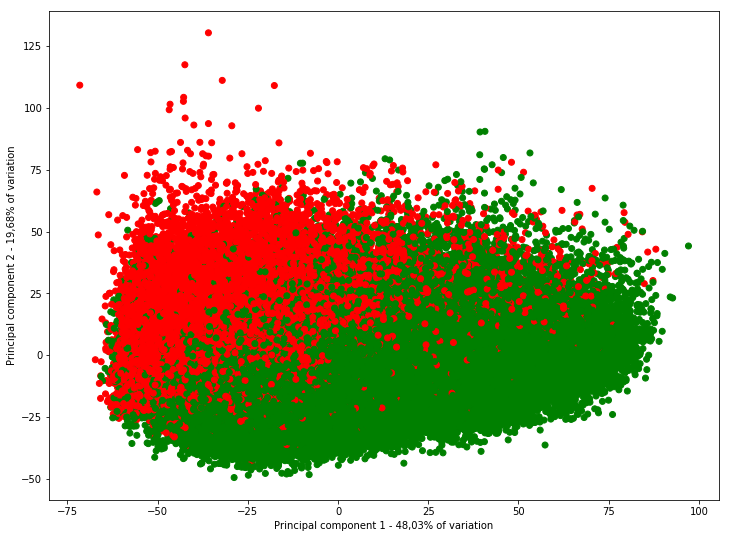

In [158]:
plt.figure(figsize=[12, 9])
plt.scatter(pc1, pc2, c=class_colors)
plt.xlabel('Principal component 1 - 48,03% of variation')
plt.ylabel('Principal component 2 - 19,68% of variation')
plt.show()

Как можно увидеть на графике, классы не очень хорошо отделимы друг от друга при использовании двух главных компонент

<h1>6. Использование RandomForest с преобразованными по Методу главных компонент данными</h1>

Так как в предыдущем пункте 12 главных компонент дали нам возможность объяснить 99% вариации, то для ускорения обучения будем использовать их, а не исходный датасет:

In [175]:
X_12d = PCA(n_components=12, random_state=42).fit_transform(new_X)

<h1>7. Предсказание количества осадков в мм</h1>

In [122]:
y_risk = data['RISK_MM']

Посмотрим на основные описательные статистики переменной "Риск, мм":

In [123]:
y_risk.describe()

count    142193.000000
mean          2.360682
std           8.477969
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: RISK_MM, dtype: float64

Как видим, пик распределния переменной RISK_MM сильно смещён влево

Построим функциию плотности для RISK_MM, используя метод Дэвида-Скотта:

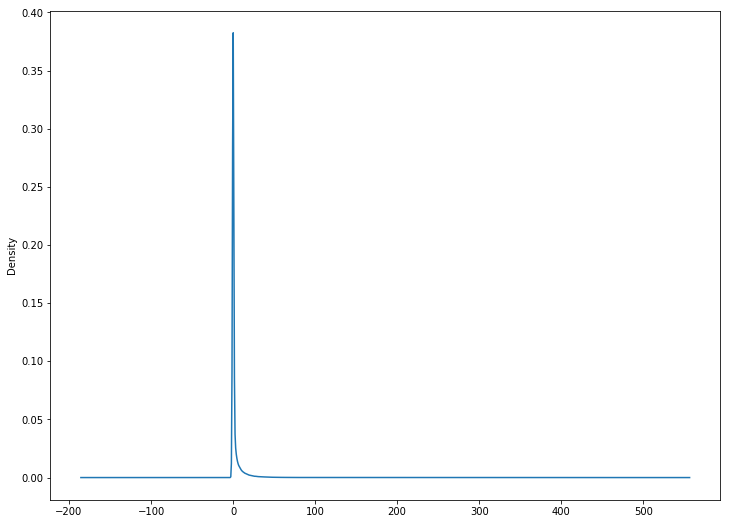

In [126]:
y_risk.plot.density(figsize=(12,9))

Так как переменная явно распределена ненормально, то линейная регрессия не должна показать хороший результат, но мы попробуем:

In [129]:
from sklearn.linear_model import LinearRegression

In [159]:
lm_risk = LinearRegression()
X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(new_X, y_risk, random_state=42)
lm_risk.fit(X_train_risk, y_train_risk)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Посмотрим на её качество на обучающей выборке:

In [160]:
lm_risk.score(X_train_risk, y_train_risk)

0.2212349332530773

И на тестовой выборке:

In [161]:
lm_risk.score(X_test_risk, y_test_risk)

0.21597441421597574

Как видим, линейная регрессия справляется здесь не очень хорошо

Отложим на графике значения $y$ и первой главной компоненты$X$, чтобы определить возможную функциональную форму модели:

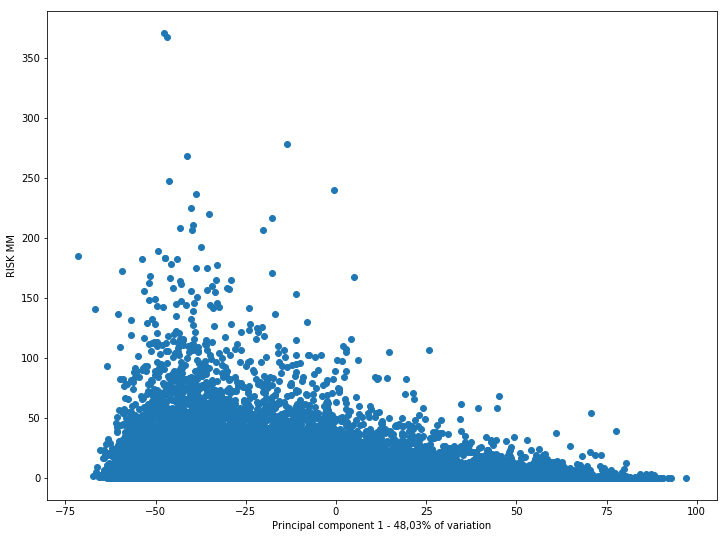

In [163]:
plt.figure(figsize=(12,9))
plt.scatter(pc1, y_risk)
plt.xlabel('Principal component 1 - 48,03% of variation')
plt.ylabel('RISK MM')
plt.show()

Как можно увидеть, функциональная зависимость между первой главной компонентой $X$ и RISK_MM не прослеживается

Попробуем сделать то же самое для второй компоненты:

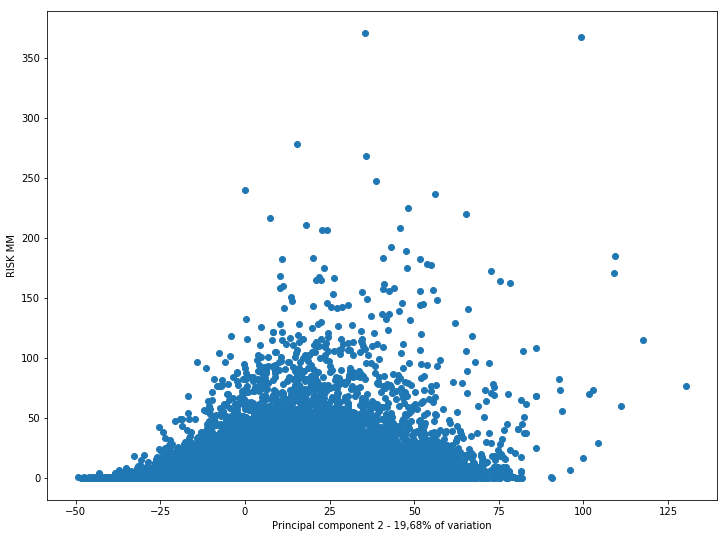

In [165]:
plt.figure(figsize=(12,9))
plt.scatter(pc2, y_risk)
plt.xlabel('Principal component 2 - 19,68% of variation')
plt.ylabel('RISK MM')
plt.show()

Попробуем использовать RandomForestRegressor На 12 главных компонентах:

In [173]:
from sklearn.ensemble import RandomForestRegressor

In [176]:
rf_regressor_risk = RandomForestRegressor(random_state = 42, oob_score=True).fit(X_12d, y_risk)
rf_regressor_risk.oob_score_

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


0.009801180710542257

oob_score получается очень плохим

посмотрим на качество регрессии:

In [179]:
rf_regressor_risk.score(X_12d, y_risk)

0.848699506768404

In [ ]:
Тем не менее, качество подгонки оказывается хорошим